# Geometric オブジェクト

Geometricオブジェクトは、次のような地理空間データをPython のオブジェクトとして処理できるオブジェクトです。

- Point
- LineString
- Polygon
- MultiPoint
- MultiLineString

> Pythonデータ分析 実践ハンドブック
> 
> https://book.impress.co.jp/books/1122101021
> 
> p305. 10-3 地理空間データの操作

In [1]:
from urllib import request

import folium
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString, Point, Polygon
from shapely import from_geojson

In [2]:
stations_list = [
    "東京",
    "神田",
    "秋葉原",
    "御徒町",
    "上野",
    "鶯谷",
    "日暮里",
    "西日暮里",
    "田端",
    "駒込",
    "巣鴨",
    "大塚",
    "池袋",
    "目白",
    "高田馬場",
    "新大久保",
    "新宿",
    "代々木",
    "原宿",
    "渋谷",
    "恵比寿",
    "目黒",
    "五反田",
    "大崎",
    "品川",
    "高輪ゲートウェイ",
    "田町",
    "浜松町",
    "新橋",
    "有楽町",
]
tables = pd.read_html("http://www.desktoptetsu.com/quiz/jr-stations.htm", header=0)
stations_df = (
    tables[1]
    .set_index("駅名")
    .loc[stations_list, ["経度(東経)", "緯度(北緯)"]]
    .set_axis(["lon", "lat"], axis=1)
)
stations_df

,lon,lat
駅名,,
東京,139.766667,35.681111
神田,139.770833,35.691667
秋葉原,139.773056,35.698333
御徒町,139.774639,35.707417
上野,139.777222,35.713889
鶯谷,139.778833,35.720500
日暮里,139.770972,35.727778
西日暮里,139.766667,35.732083
田端,139.760833,35.738056


## Point

ポイント(Point)を処理する場合は、 PointクラスからGeometricオブジェクトを生成します。第1引数にX 値となる座標、第 2 引数にY 値となる座標を渡すか、これらが含まれたシーケンス型のデータを渡します。

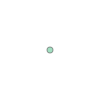

In [3]:
Point(139.766667, 35.681111)
# or
Point([139.766667, 35.681111])

In [4]:
stations_point = stations_df.apply(lambda x: Point(x), axis=1)
stations_point

駅名
東京          POINT (139.766667 35.681111)
神田          POINT (139.770833 35.691667)
秋葉原         POINT (139.773056 35.698333)
御徒町         POINT (139.774639 35.707417)
上野          POINT (139.777222 35.713889)
鶯谷            POINT (139.778833 35.7205)
日暮里         POINT (139.770972 35.727778)
西日暮里        POINT (139.766667 35.732083)
田端          POINT (139.760833 35.738056)
駒込          POINT (139.746861 35.736472)
巣鴨          POINT (139.739333 35.733472)
大塚          POINT (139.728056 35.731833)
池袋          POINT (139.710861 35.729722)
目白          POINT (139.706583 35.721194)
高田馬場         POINT (139.70375 35.712222)
新大久保        POINT (139.700056 35.701306)
新宿          POINT (139.700278 35.690833)
代々木         POINT (139.702083 35.683056)
原宿          POINT (139.702694 35.670167)
渋谷          POINT (139.701111 35.658611)
恵比寿         POINT (139.710139 35.646667)
目黒          POINT (139.715833 35.634028)
五反田         POINT (139.723472 35.626389)
大崎          POINT (139.728556 35.619722)
品川          P

In [5]:
tokyo = stations_point.loc["東京"]

In [6]:
tokyo.x, tokyo.y

(139.766667, 35.681111)

In [7]:
tokyo.coords[:]

[(139.766667, 35.681111)]

### Pointの可視化

In [8]:
# 経度・緯度の平均値を中心とする
lat, lon = stations_df.mean()

In [9]:
points_map = folium.Map(location=(lon, lat), zoom_start=12)
for station in stations_point.index:
    p = stations_point.loc[station]
    folium.Marker(location=(p.y, p.x), popup=station).add_to(points_map)
points_map

## LineString

ライン(LineString)を処理する場合は、 LineStringクラスからGeometricオブジェクトを生成します。引数には、 Pointまたは座標を入れたシーケンス型を入れたシーケンス型を渡します。

In [10]:
shinagawa = stations_point.loc["品川"]
shinagawa.coords[:]

[(139.738694, 35.628222)]

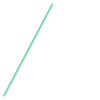

In [11]:
LineString([(139.766667, 35.681111), (139.738694, 35.628222)])
# or
LineString([tokyo, shinagawa])

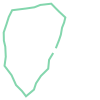

In [12]:
yamanote_line = LineString(stations_point)
yamanote_line

## LineStringの可視化

In [13]:
np.array(LineString(stations_point).coords[:])

array([[139.766667,  35.681111],
       [139.770833,  35.691667],
       [139.773056,  35.698333],
       [139.774639,  35.707417],
       [139.777222,  35.713889],
       [139.778833,  35.7205  ],
       [139.770972,  35.727778],
       [139.766667,  35.732083],
       [139.760833,  35.738056],
       [139.746861,  35.736472],
       [139.739333,  35.733472],
       [139.728056,  35.731833],
       [139.710861,  35.729722],
       [139.706583,  35.721194],
       [139.70375 ,  35.712222],
       [139.700056,  35.701306],
       [139.700278,  35.690833],
       [139.702083,  35.683056],
       [139.702694,  35.670167],
       [139.701111,  35.658611],
       [139.710139,  35.646667],
       [139.715833,  35.634028],
       [139.723472,  35.626389],
       [139.728556,  35.619722],
       [139.738694,  35.628222],
       [139.741389,  35.636389],
       [139.747583,  35.645722],
       [139.756944,  35.655   ],
       [139.758056,  35.666389],
       [139.763333,  35.675056]])

In [14]:
np.fliplr(LineString(stations_point).coords[:])

array([[ 35.681111, 139.766667],
       [ 35.691667, 139.770833],
       [ 35.698333, 139.773056],
       [ 35.707417, 139.774639],
       [ 35.713889, 139.777222],
       [ 35.7205  , 139.778833],
       [ 35.727778, 139.770972],
       [ 35.732083, 139.766667],
       [ 35.738056, 139.760833],
       [ 35.736472, 139.746861],
       [ 35.733472, 139.739333],
       [ 35.731833, 139.728056],
       [ 35.729722, 139.710861],
       [ 35.721194, 139.706583],
       [ 35.712222, 139.70375 ],
       [ 35.701306, 139.700056],
       [ 35.690833, 139.700278],
       [ 35.683056, 139.702083],
       [ 35.670167, 139.702694],
       [ 35.658611, 139.701111],
       [ 35.646667, 139.710139],
       [ 35.634028, 139.715833],
       [ 35.626389, 139.723472],
       [ 35.619722, 139.728556],
       [ 35.628222, 139.738694],
       [ 35.636389, 139.741389],
       [ 35.645722, 139.747583],
       [ 35.655   , 139.756944],
       [ 35.666389, 139.758056],
       [ 35.675056, 139.763333]])

In [15]:
line_map = folium.Map(location=(lon, lat), zoom_start=12)
folium.PolyLine(locations=np.fliplr(LineString(stations_point).coords[:])).add_to(
    line_map
)
line_map

In [16]:
line_map = folium.Map(location=(lon, lat), zoom_start=12)
folium.GeoJson(yamanote_line).add_to(line_map)
line_map

## Polygon

ポリゴン(Polygon)を処理する場合は、 PolygonクラスからGeometricオブジェクトを生成します。引数には、ポイント(Point)を入れたシーケンス型を渡します。

In [17]:
shinjuku = stations_point.loc["新宿"]
shinjuku.coords[:]

[(139.700278, 35.690833)]

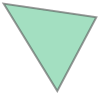

In [18]:
Polygon([(139.766667, 35.681111), (139.738694, 35.628222), (139.700278, 35.690833)])
# or
Polygon([tokyo, shinagawa, shinjuku])

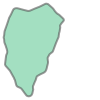

In [19]:
with request.urlopen(
    "https://raw.githubusercontent.com/fin-py/geo-data-hands-on/main/data/jr_yamanote_polygon.geojson"
) as res:
    yamanote_polygon = from_geojson(res.read())

yamanote_polygon

In [20]:
print(yamanote_polygon)

GEOMETRYCOLLECTION (POLYGON ((139.76716 35.68228, 139.76621 35.67965, 139.76621 35.67965, 139.76552 35.6778, 139.76523 35.67711, 139.76523 35.67711, 139.76499 35.67662, 139.76471 35.67626, 139.76444 35.67597, 139.76398 35.6756, 139.76398 35.6756, 139.76254 35.67448, 139.76254 35.67448, 139.76206 35.6741, 139.7616 35.67372, 139.76116 35.67336, 139.76074 35.67299, 139.76054 35.67274, 139.76034 35.67244, 139.75991 35.67163, 139.7598 35.67143, 139.75899 35.66991, 139.75851 35.66913, 139.75836 35.66886, 139.75826 35.66863, 139.7582 35.66841, 139.75817 35.66821, 139.75814 35.6672, 139.75814 35.6672, 139.75826 35.66558, 139.75826 35.66558, 139.75842 35.66432, 139.7586 35.66291, 139.7586 35.66209, 139.75857 35.66147, 139.75847 35.66084, 139.75824 35.65987, 139.75817 35.65958, 139.75745 35.65678, 139.75734 35.65638, 139.75728 35.65614, 139.75728 35.65614, 139.75697 35.65468, 139.75697 35.65468, 139.75666 35.65357, 139.75642 35.6527, 139.75609 35.65196, 139.75551 35.65073, 139.75514 35.65021, 13

### Polygonの可視化

In [21]:
polygon_map = folium.Map(location=(lon, lat), zoom_start=12)
folium.GeoJson(yamanote_polygon).add_to(polygon_map)
polygon_map

> 国土数値情報ダウンロードサービス > 国土数値情報 > 鉄道データ
> 
> https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N02-v3_0.html

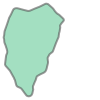

In [22]:
yamanote_rail_polygon = gpd.read_file(
    "https://github.com/fin-py/geo-data-hands-on/raw/main/data/jr_yamanote_polygon.geojson"
).iloc[0, 0]
yamanote_rail_polygon

In [23]:
polygon_map = folium.Map(location=(lon, lat), zoom_start=12)
folium.GeoJson(yamanote_rail_polygon).add_to(polygon_map)
polygon_map

## 都庁と千代田区役所はJR山手線の内側か外側か？

東京都庁舎

> https://geohack.toolforge.org/geohack.php?language=ja&pagename=%E6%9D%B1%E4%BA%AC%E9%83%BD%E5%BA%81%E8%88%8E&params=35_41_22.2_N_139_41_30.3_E_type:landmark_region:JP

In [24]:
tocho = Point(139.69175, 35.6895)
yamanote_rail_polygon.contains(tocho)

False

千代田区役所

> https://geohack.toolforge.org/geohack.php?language=ja&pagename=%E5%8D%83%E4%BB%A3%E7%94%B0%E5%8C%BA%E5%BD%B9%E6%89%80&params=35.694003_N_139.753634_E_

In [25]:
chiyoda_kuyakusho = Point(139.753634, 35.694003)
yamanote_rail_polygon.contains(chiyoda_kuyakusho)

True

In [26]:
yakusho_map = folium.Map(location=(lon, lat), zoom_start=12)
folium.GeoJson(yamanote_rail_polygon).add_to(yakusho_map)
folium.Marker(location=(tocho.y, tocho.x), tooltip="都庁").add_to(yakusho_map)
folium.Marker(
    location=(chiyoda_kuyakusho.y, chiyoda_kuyakusho.x), tooltip="千代田区役所"
).add_to(yakusho_map)
yakusho_map